In [8]:
using LinearAlgebra
using Plots
include("./fft.jl")

conv (generic function with 1 method)

Testing the FFT function

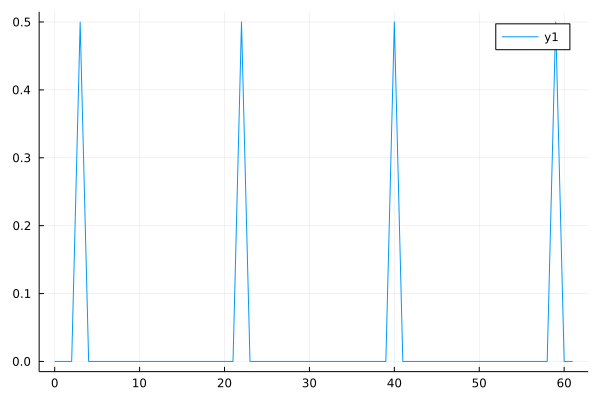

In [11]:
f = x -> sin(3x) + sin(40x)
n=31
z = range(0, 2π, length=2n+1)[1:end-1]
samples = f.(z)
A = fftmatrix(n)
f̂ = (1 / sqrt(2n)) * A * samples

plot(0:length(f̂)-1, abs.(f̂))